In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv("Premier_League.csv")

In [2]:
data.head()

,date,clock,stadium,attendance,Home Team,Goals Home,Away Team,Away Goals,home_possessions,away_possessions,...,away_duels,home_saves,away_saves,home_fouls,away_fouls,home_yellow,away_yellow,home_red,away_red,links
0,28th May 2023,4:30pm,Emirates Stadium,"60,095",Arsenal,5,Wolverhampton Wanderers,0,51.0,49.0,...,52.2,0,3,8,11,0,0,0,0,https://www.skysports.com/football/arsenal-vs-...
1,28th May 2023,4:30pm,Villa Park,"42,212",Aston Villa,2,Brighton and Hove Albion,1,40.3,59.7,...,47.8,3,3,15,16,4,4,0,0,https://www.skysports.com/football/aston-villa...
2,28th May 2023,4:30pm,Gtech Community Stadium,"17,120",Brentford,1,Manchester City,0,34.4,65.6,...,50.0,2,3,12,8,4,0,0,0,https://www.skysports.com/football/brentford-v...
3,28th May 2023,4:30pm,Stamford Bridge,"40,130",Chelsea,1,Newcastle United,1,64.4,35.6,...,45.5,3,5,9,11,0,0,0,0,https://www.skysports.com/football/chelsea-vs-...
4,28th May 2023,4:30pm,Selhurst Park,"25,198",Crystal Palace,1,Nottingham Forest,1,66.0,34.0,...,41.7,3,2,9,13,0,2,0,0,https://www.skysports.com/football/crystal-pal...


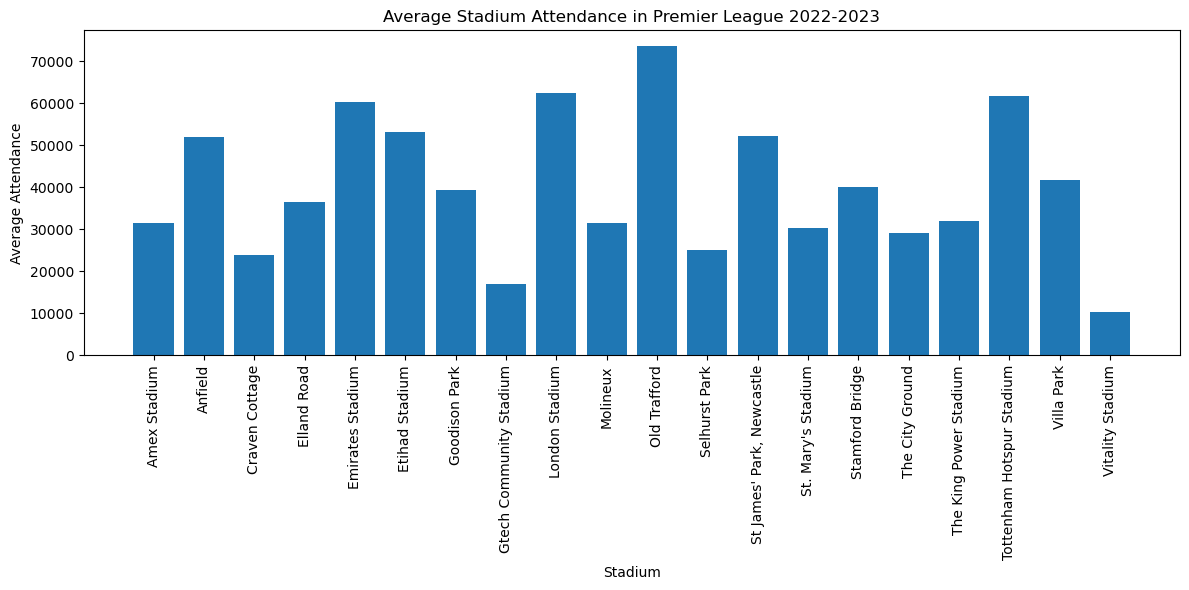

In [3]:
from matplotlib.ticker import FuncFormatter


#data['attendance'].fillna(0, inplace=True)  # Filling any missing values with 0
data['attendance'] = data['attendance'].str.replace(',', '').astype(float)
data['attendance'] = pd.to_numeric(data['attendance'])
data.replace('Nan', np.nan, inplace=True)
data.dropna(subset=['stadium'], inplace=True)
avg_attendance = data.groupby('stadium')['attendance'].mean().reset_index()

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(avg_attendance['stadium'], avg_attendance['attendance'])
plt.xlabel('Stadium')
plt.ylabel('Average Attendance')
plt.title('Average Stadium Attendance in Premier League 2022-2023')

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

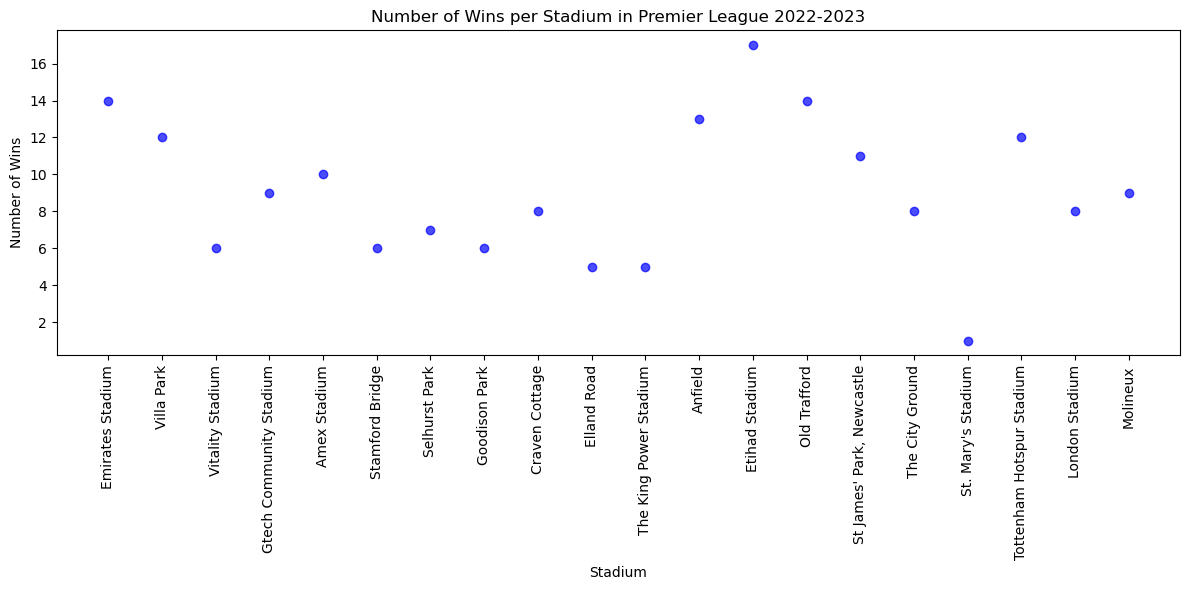

The stadium with the most wins is Etihad Stadium with 17 wins!!!
Manchester City has had an amazing season :P


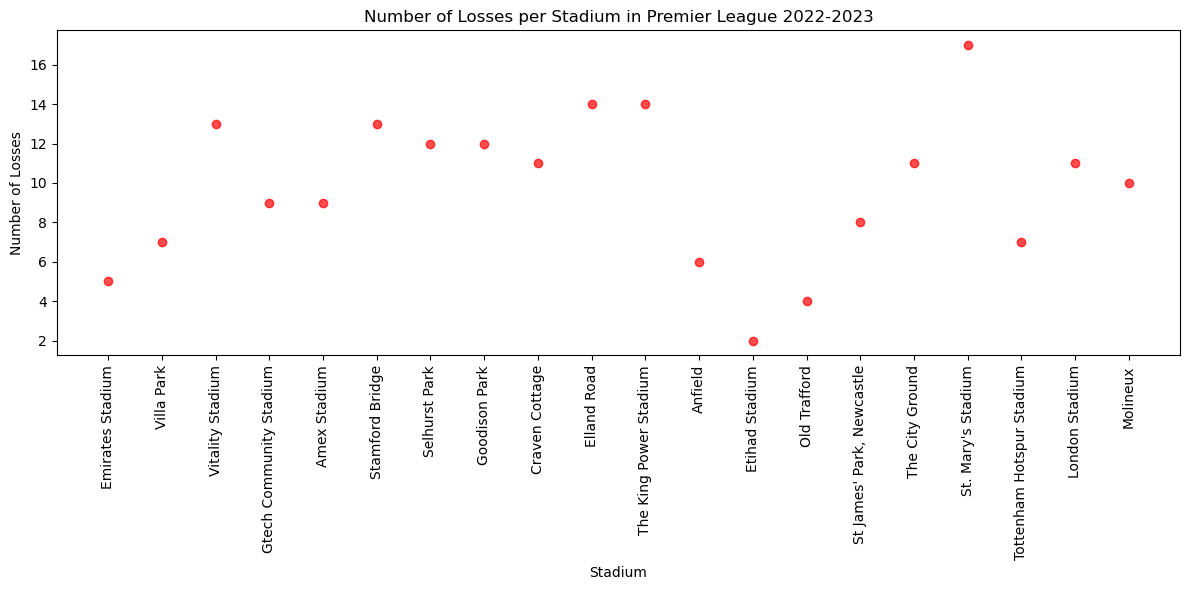

The stadium with the most losses is St. Mary's Stadium with 17 losses!!!
Southampton has had a disappointing season :(


In [4]:
# Calculate the wins for each team
def calculate_wins(row):
    if row['Goals Home'] > row['Away Goals']:
        return 1
    else:
        return 0
    
def calculate_loss(row):
    if row['Goals Home'] > row['Away Goals']:
        return 0
    else:
        return 1

data['Wins'] = data.apply(calculate_wins, axis=1)

# Group by stadium and sum the wins
stadium_wins = data.groupby(['Home Team','stadium'])['Wins'].sum().reset_index()

# Plotting a scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(stadium_wins['stadium'], stadium_wins['Wins'], color='b', alpha=0.7)
plt.xlabel('Stadium')
plt.ylabel('Number of Wins')
plt.title('Number of Wins per Stadium in Premier League 2022-2023')

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
stadium_with_most_wins = stadium_wins.loc[stadium_wins['Wins'].idxmax()]

print(f"The stadium with the most wins is {stadium_with_most_wins['stadium']} with {stadium_with_most_wins['Wins']} wins!!!")
print(f"{stadium_with_most_wins['Home Team']} has had an amazing season :P")

data['Loss'] = data.apply(calculate_loss, axis=1)
stadium_loss = data.groupby(['Home Team','stadium'])['Loss'].sum().reset_index()
plt.figure(figsize=(12, 6))
plt.scatter(stadium_loss['stadium'], stadium_loss['Loss'], color='r', alpha=0.7)
plt.xlabel('Stadium')
plt.ylabel('Number of Losses')
plt.title('Number of Losses per Stadium in Premier League 2022-2023')

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
stadium_with_most_losses = stadium_loss.loc[stadium_loss['Loss'].idxmax()]

print(f"The stadium with the most losses is {stadium_with_most_losses['stadium']} with {stadium_with_most_losses['Loss']} losses!!!")
print(f"{stadium_with_most_losses['Home Team']} has had a disappointing season :(")


In [5]:
data.head()

,date,clock,stadium,attendance,Home Team,Goals Home,Away Team,Away Goals,home_possessions,away_possessions,...,away_saves,home_fouls,away_fouls,home_yellow,away_yellow,home_red,away_red,links,Wins,Loss
0,28th May 2023,4:30pm,Emirates Stadium,60095.0,Arsenal,5,Wolverhampton Wanderers,0,51.0,49.0,...,3,8,11,0,0,0,0,https://www.skysports.com/football/arsenal-vs-...,1,0
1,28th May 2023,4:30pm,Villa Park,42212.0,Aston Villa,2,Brighton and Hove Albion,1,40.3,59.7,...,3,15,16,4,4,0,0,https://www.skysports.com/football/aston-villa...,1,0
2,28th May 2023,4:30pm,Gtech Community Stadium,17120.0,Brentford,1,Manchester City,0,34.4,65.6,...,3,12,8,4,0,0,0,https://www.skysports.com/football/brentford-v...,1,0
3,28th May 2023,4:30pm,Stamford Bridge,40130.0,Chelsea,1,Newcastle United,1,64.4,35.6,...,5,9,11,0,0,0,0,https://www.skysports.com/football/chelsea-vs-...,0,1
4,28th May 2023,4:30pm,Selhurst Park,25198.0,Crystal Palace,1,Nottingham Forest,1,66.0,34.0,...,2,9,13,0,2,0,0,https://www.skysports.com/football/crystal-pal...,0,1


In [6]:
stadium_with_most_wins

Home Team    Manchester City
stadium       Etihad Stadium
Wins                      17
Name: 12, dtype: object

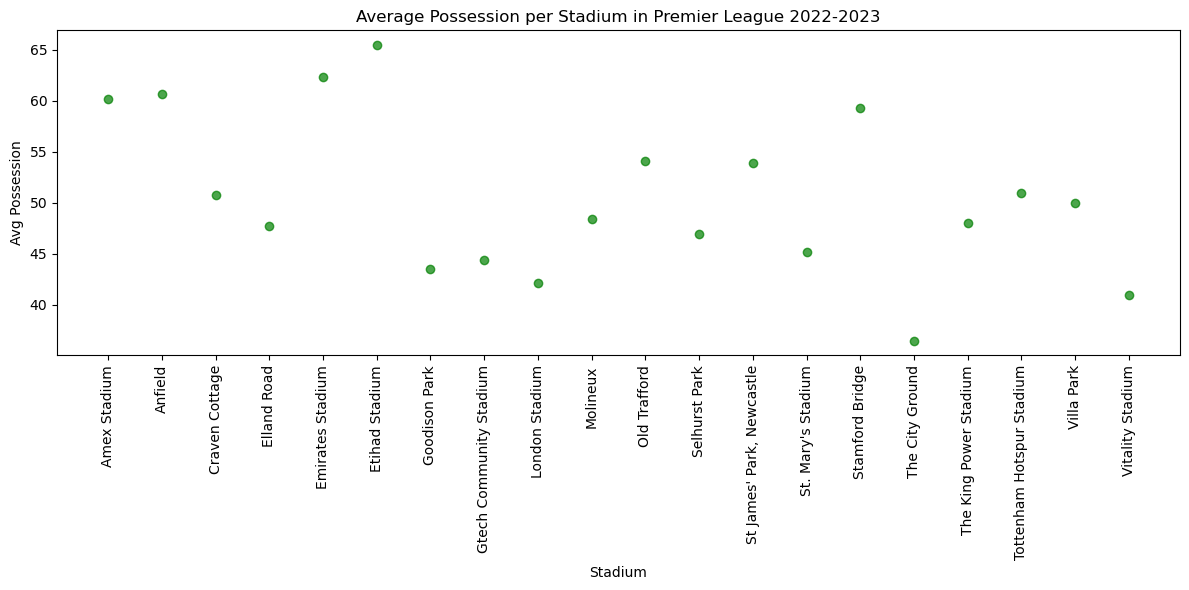

Manchester City has had the best possession in their stadium!!
Nottingham Forest has had the worst possession in their stadium!!


In [7]:
possession = data.groupby(['stadium','Home Team'])['home_possessions'].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.scatter(possession['stadium'], possession['home_possessions'], color='g', alpha=0.7)
plt.xlabel('Stadium')
plt.ylabel('Avg Possession')
plt.title('Average Possession per Stadium in Premier League 2022-2023')

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

best_pos = possession.loc[possession['home_possessions'].idxmax()]
worst_pos = possession.loc[possession['home_possessions'].idxmin()]

print(f"{best_pos['Home Team']} has had the best possession in their stadium!!")
print(f"{worst_pos['Home Team']} has had the worst possession in their stadium!!")

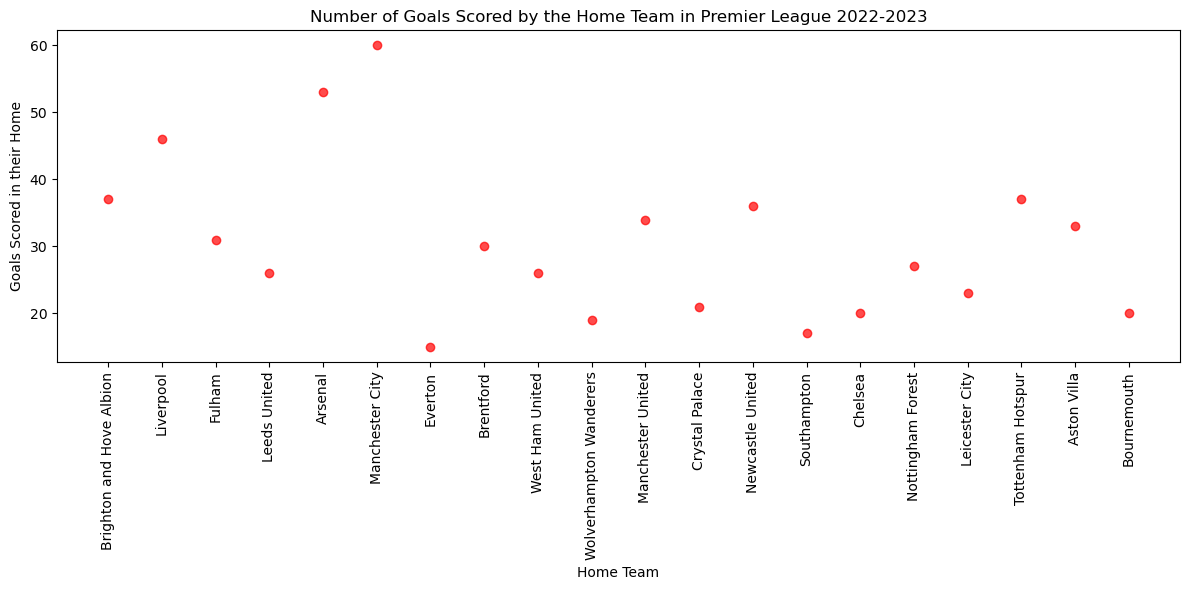

The Team with the most Home Goals is Manchester City with 60 goals!!!
Manchester City has had an amazing season :P
The Team with the least Home Goals is Everton with 15 goals!!!
Everton has had an awful season :(


In [8]:
home_goals = data.groupby(['stadium','Home Team'])['Goals Home'].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.scatter(home_goals['Home Team'], home_goals['Goals Home'], color='r', alpha=0.7)
plt.xlabel('Home Team')
plt.ylabel('Goals Scored in their Home')
plt.title('Number of Goals Scored by the Home Team in Premier League 2022-2023')

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
team_with_most_goals = home_goals.loc[home_goals['Goals Home'].idxmax()]
least = home_goals.loc[home_goals['Goals Home'].idxmin()]

print(f"The Team with the most Home Goals is {team_with_most_goals['Home Team']} with {team_with_most_goals['Goals Home']} goals!!!")
print(f"{team_with_most_goals['Home Team']} has had an amazing season :P")

print(f"The Team with the least Home Goals is {least['Home Team']} with {least['Goals Home']} goals!!!")
print(f"{least['Home Team']} has had an awful season :(")

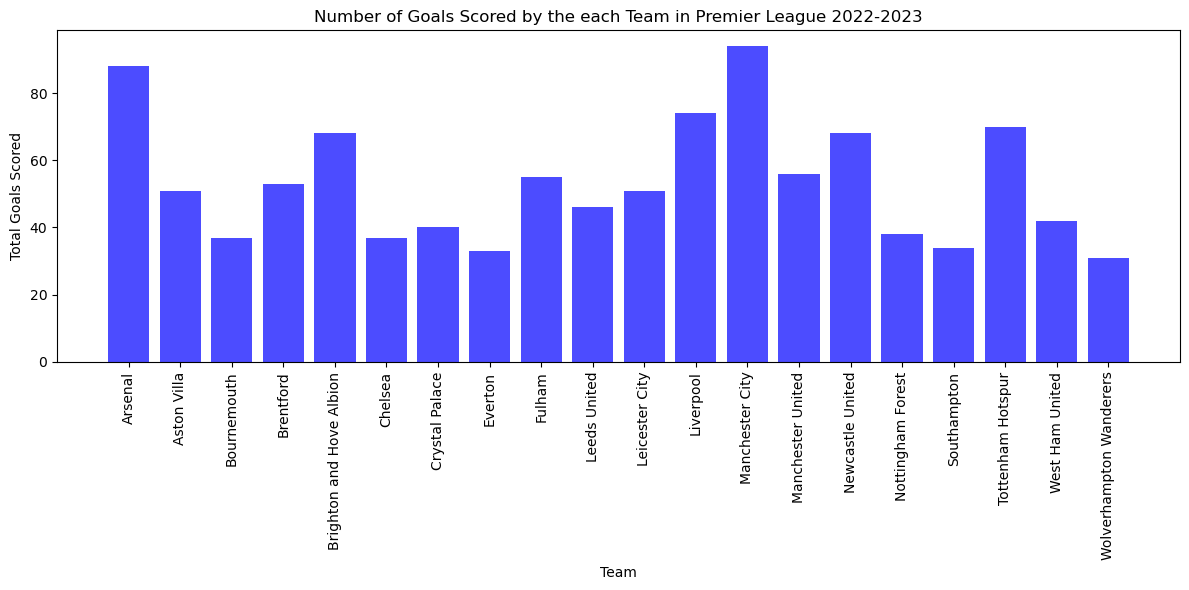

The Team with the most Goals is Manchester City with 94 goals!!!
Manchester City has had an amazing season :P
The Team with the least Goals is Everton with 33 goals!!!
Everton has had an awful season :(


In [9]:
home_goals = data.groupby('Home Team')[['Goals Home','home_yellow','home_red','home_shots']].sum().reset_index()
away_goals = data.groupby('Away Team')[['Away Goals','away_yellow','away_red','away_shots']].sum().reset_index()
total_goals = pd.merge(home_goals, away_goals, left_on='Home Team', right_on='Away Team', suffixes=('_home', '_away'))
total_goals['Total Goals'] = total_goals['Goals Home'] + total_goals['Away Goals']
total_goals['Total Yellow'] = total_goals['home_yellow'] + total_goals['away_yellow']
total_goals['Total Red'] = total_goals['home_red'] + total_goals['away_red']
total_goals['Total Shots'] = total_goals['home_shots'] + total_goals['away_shots']

plt.figure(figsize=(12, 6))
plt.bar(total_goals['Home Team'], total_goals['Total Goals'], color='b', alpha=0.7)
plt.xlabel('Team')
plt.ylabel('Total Goals Scored')
plt.title('Number of Goals Scored by the each Team in Premier League 2022-2023')

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

most = total_goals.loc[total_goals['Goals Home'].idxmax()]
least = total_goals.loc[total_goals['Goals Home'].idxmin()]

print(f"The Team with the most Goals is {most['Home Team']} with {most['Total Goals']} goals!!!")
print(f"{most['Home Team']} has had an amazing season :P")

print(f"The Team with the least Goals is {least['Home Team']} with {least['Total Goals']} goals!!!")
print(f"{least['Home Team']} has had an awful season :(")

In [10]:
total_goals

,Home Team,Goals Home,home_yellow,home_red,home_shots,Away Team,Away Goals,away_yellow,away_red,away_shots,Total Goals,Total Yellow,Total Red,Total Shots
0,Arsenal,53,17,0,354,Arsenal,35,35,0,239,88,52,0,593
1,Aston Villa,33,37,0,226,Aston Villa,18,43,1,205,51,80,1,431
2,Bournemouth,20,30,0,198,Bournemouth,17,39,0,160,37,69,0,358
3,Brentford,30,26,1,224,Brentford,23,27,0,170,53,53,1,394
4,Brighton and Hove Albion,37,32,0,351,Brighton and Hove Albion,31,26,0,243,68,58,0,594
5,Chelsea,20,38,1,260,Chelsea,17,38,2,214,37,76,3,474
6,Crystal Palace,21,33,2,232,Crystal Palace,19,46,1,194,40,79,3,426
7,Everton,15,34,1,222,Everton,18,42,1,197,33,76,2,419
8,Fulham,31,27,1,239,Fulham,24,53,0,190,55,80,1,429
9,Leeds United,26,38,2,252,Leeds United,20,44,1,193,46,82,3,445


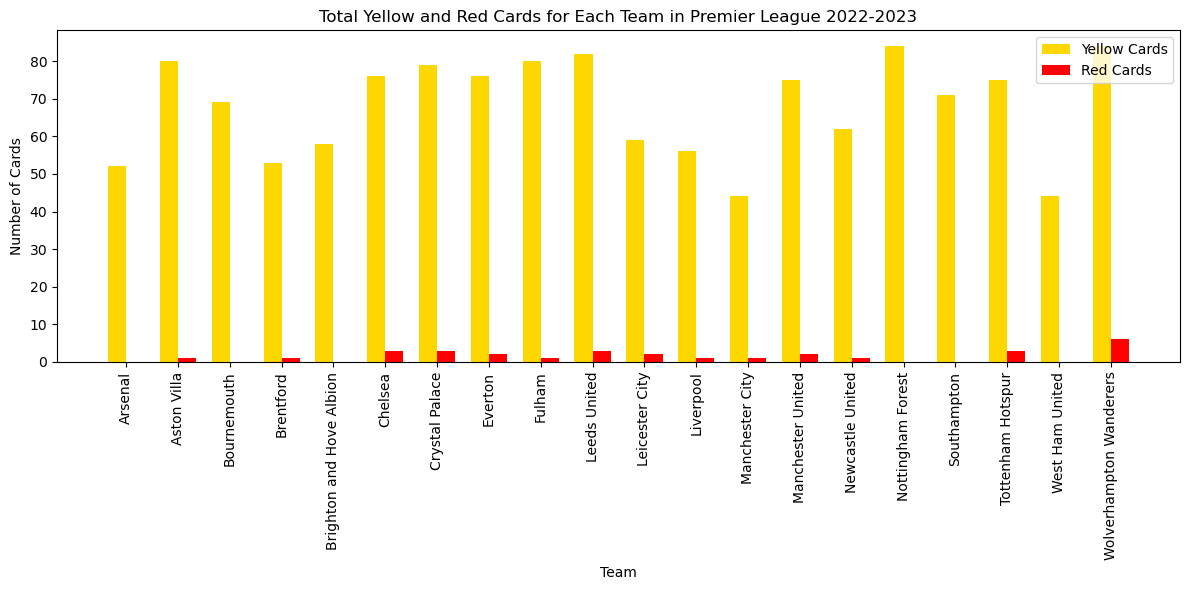

In [11]:
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = total_goals.index
plt.bar(index, total_goals['Total Yellow'], bar_width, label='Yellow Cards', color='gold')
plt.bar(index + bar_width, total_goals['Total Red'], bar_width, label='Red Cards', color='red')

plt.xlabel('Team')
plt.ylabel('Number of Cards')
plt.title('Total Yellow and Red Cards for Each Team in Premier League 2022-2023')
plt.xticks(index + bar_width / 2, total_goals['Home Team'], rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

In [12]:


home_shots = data.groupby('Home Team')[['home_shots','Goals Home']].mean().reset_index()
away_shots = data.groupby('Away Team')[['away_shots','Away Goals']].mean().reset_index()
team_shots = pd.merge(home_shots, away_shots, left_on='Home Team', right_on='Away Team', suffixes=('_homeshot', '_awayshot'))
team_shots['home - away'] = team_shots['home_shots'] - team_shots['away_shots']
team_shots['accuracy_home%'] = (team_shots['Goals Home'] / team_shots['home_shots']) * 100
team_shots['accuracy_away%'] = (team_shots['Away Goals'] / team_shots['away_shots']) * 100
team_shots

,Home Team,home_shots,Goals Home,Away Team,away_shots,Away Goals,home - away,accuracy_home%,accuracy_away%
0,Arsenal,18.631579,2.789474,Arsenal,12.578947,1.842105,6.052632,14.971751,14.644351
1,Aston Villa,11.894737,1.736842,Aston Villa,10.789474,0.947368,1.105263,14.601770,8.780488
2,Bournemouth,10.421053,1.052632,Bournemouth,8.421053,0.894737,2.000000,10.101010,10.625000
3,Brentford,12.444444,1.666667,Brentford,8.947368,1.210526,3.497076,13.392857,13.529412
4,Brighton and Hove Albion,18.473684,1.947368,Brighton and Hove Albion,13.500000,1.722222,4.973684,10.541311,12.757202
5,Chelsea,13.684211,1.052632,Chelsea,11.888889,0.944444,1.795322,7.692308,7.943925
6,Crystal Palace,12.210526,1.105263,Crystal Palace,10.210526,1.000000,2.000000,9.051724,9.793814
7,Everton,12.333333,0.833333,Everton,10.368421,0.947368,1.964912,6.756757,9.137056
8,Fulham,12.578947,1.631579,Fulham,10.000000,1.263158,2.578947,12.970711,12.631579
9,Leeds United,13.263158,1.368421,Leeds United,10.722222,1.111111,2.540936,10.317460,10.362694


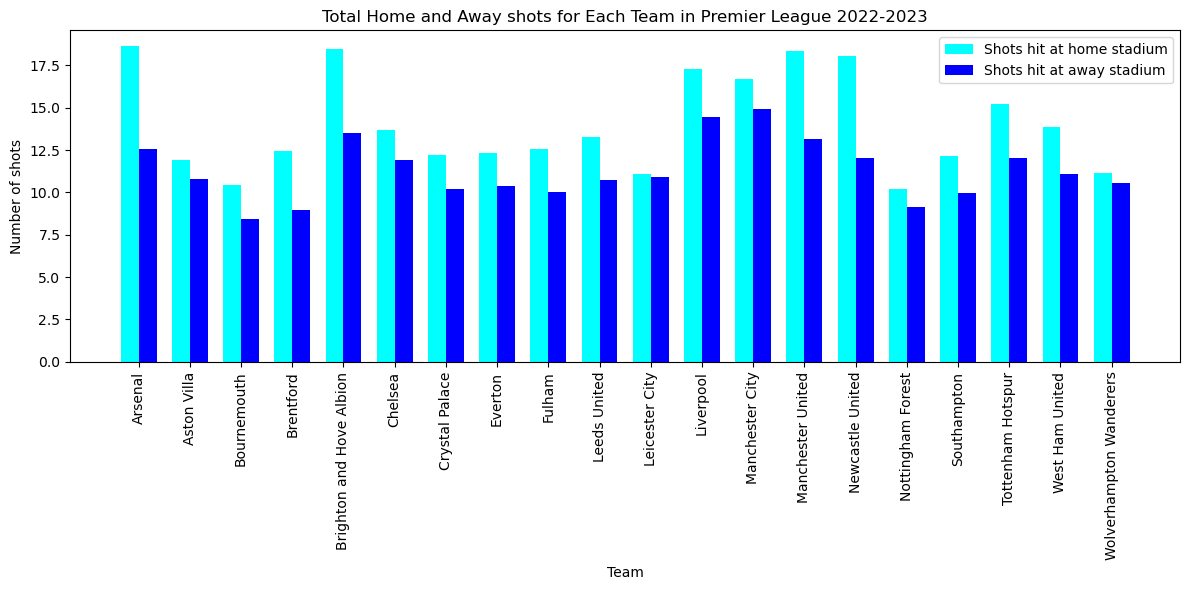

The team most dependent on their home stadium for shots is Newcastle United
The team that has the most accuracy at home is Manchester City with an accuracy of 18.92744479495268
The team that has the most accuracy away is Arsenal with an accuracy of 14.644351464435147
The team that has the least accuracy at home is Everton with an accuracy of 6.756756756756757
The team that has the least accuracy away is Wolverhampton Wanderers with an accuracy of 5.999999999999999


In [13]:
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = team_shots.index
plt.bar(index, team_shots['home_shots'], bar_width, label='Shots hit at home stadium', color='cyan')
plt.bar(index + bar_width, team_shots['away_shots'], bar_width, label='Shots hit at away stadium', color='blue')

plt.xlabel('Team')
plt.ylabel('Number of shots')
plt.title('Total Home and Away shots for Each Team in Premier League 2022-2023')
plt.xticks(index + bar_width / 2, team_shots['Home Team'], rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

home_dependent = team_shots.loc[team_shots['home - away'].idxmax()] 
print(f"The team most dependent on their home stadium for shots is {home_dependent['Home Team']}")

most_Ac_home = team_shots.loc[team_shots['accuracy_home%'].idxmax()]
most_Ac_away = team_shots.loc[team_shots['accuracy_away%'].idxmax()]
least_Ac_home = team_shots.loc[team_shots['accuracy_home%'].idxmin()]
least_Ac_away = team_shots.loc[team_shots['accuracy_away%'].idxmin()]

print(f"The team that has the most accuracy at home is {most_Ac_home['Home Team']} with an accuracy of {most_Ac_home['accuracy_home%']}")

print(f"The team that has the most accuracy away is {most_Ac_away['Home Team']} with an accuracy of {most_Ac_away['accuracy_away%']}")

print(f"The team that has the least accuracy at home is {least_Ac_home['Home Team']} with an accuracy of {least_Ac_home['accuracy_home%']}")

print(f"The team that has the least accuracy away is {least_Ac_away['Home Team']} with an accuracy of {least_Ac_away['accuracy_away%']}")

In [14]:
print("Let us check if city will win their next match or not based on this data")

Let us check if city will win their next match or not based on this data


In [15]:
team_name = "Manchester United"
data['date'] = pd.to_datetime(data['date'])
team_data = data[(data['Home Team'] == team_name) | (data['Away Team'] == team_name)].reset_index()
team_data.drop('index',axis=1,inplace=True)
team_data = team_data.sort_values('date').reset_index()
team_data.drop('index',axis=1,inplace=True)
team_data

,date,clock,stadium,attendance,Home Team,Goals Home,Away Team,Away Goals,home_possessions,away_possessions,...,away_saves,home_fouls,away_fouls,home_yellow,away_yellow,home_red,away_red,links,Wins,Loss
0,2022-08-07,2:00pm,Old Trafford,73711.0,Manchester United,1,Brighton and Hove Albion,2,62.9,37.1,...,5,7,12,4,1,0,0,https://www.skysports.com/football/manchester-...,0,1
1,2022-08-13,5:30pm,Gtech Community Stadium,17051.0,Brentford,4,Manchester United,0,33.3,66.7,...,3,6,15,0,4,0,0,https://www.skysports.com/football/brentford-v...,1,0
2,2022-08-27,12:30p,St. Mary's Stadium,31196.0,Southampton,0,Manchester United,1,48.3,51.7,...,4,4,14,0,3,0,0,https://www.skysports.com/football/southampton...,0,1
3,2022-09-01,8:00pm,The King Power Stadium,32226.0,Leicester City,0,Manchester United,1,53.9,46.1,...,2,7,15,1,3,0,0,https://www.skysports.com/football/leicester-c...,0,1
4,2022-09-04,4:30pm,Old Trafford,73431.0,Manchester United,3,Arsenal,1,39.5,60.5,...,3,13,9,3,3,0,0,https://www.skysports.com/football/manchester-...,1,0
5,2022-10-02,2:00pm,Etihad Stadium,53475.0,Manchester City,6,Manchester United,3,53.9,46.1,...,3,3,9,0,3,0,0,https://www.skysports.com/football/manchester-...,1,0
6,2022-10-09,7:00pm,Goodison Park,39258.0,Everton,1,Manchester United,2,39.7,60.3,...,1,7,13,2,1,0,0,https://www.skysports.com/football/everton-vs-...,0,1
7,2022-10-16,2:00pm,Old Trafford,73726.0,Manchester United,0,Newcastle United,0,63.0,37.0,...,2,13,11,3,1,0,0,https://www.skysports.com/football/manchester-...,0,1
8,2022-10-19,8:15pm,Old Trafford,73677.0,Manchester United,2,Tottenham Hotspur,0,51.9,48.1,...,8,7,7,1,0,0,0,https://www.skysports.com/football/manchester-...,1,0
9,2022-10-22,5:30pm,Stamford Bridge,39503.0,Chelsea,1,Manchester United,1,47.9,52.1,...,1,8,10,1,4,0,0,https://www.skysports.com/football/chelsea-vs-...,0,1


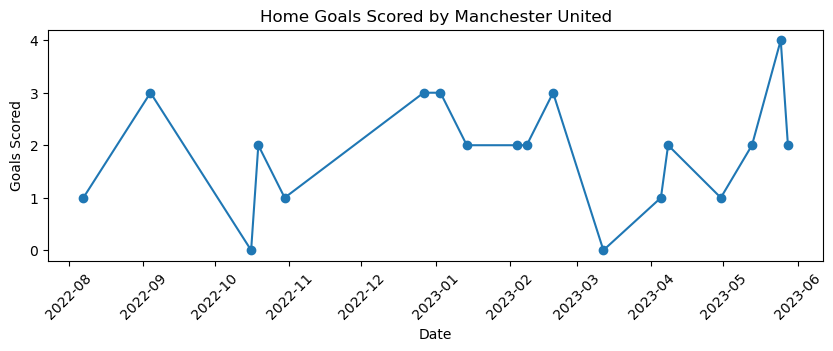

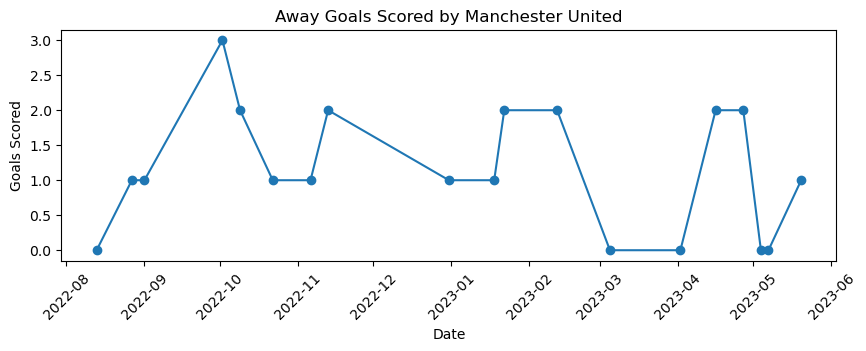

In [16]:
team_name = "Manchester United"
team_data_home = data[data['Home Team'] == team_name]
team_data_away = data[data['Away Team'] == team_name]

# Plot the home goals scored
plt.figure(figsize=(10, 3))
plt.plot(team_data_home['date'], team_data_home['Goals Home'], marker='o')
plt.title(f'Home Goals Scored by {team_name}')
plt.xlabel('Date')
plt.ylabel('Goals Scored')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 3))
plt.plot(team_data_away['date'], team_data_away['Away Goals'], marker='o')
plt.title(f'Away Goals Scored by {team_name}')
plt.xlabel('Date')
plt.ylabel('Goals Scored')
plt.xticks(rotation=45)
plt.show()


In [17]:
print("We will predict how many goals Manchester United will score in the next game")

We will predict how many goals Manchester United will score in the next game


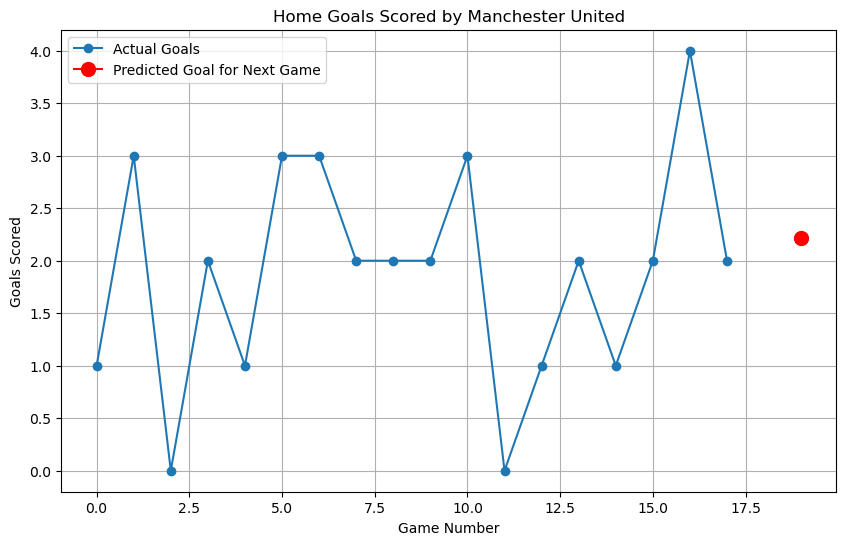

In [18]:
from sklearn.linear_model import LinearRegression

team_data1 = team_data[team_data['Home Team']==team_name].reset_index()
team_data1.drop('index',axis=1,inplace=True)
team_data2 = team_data[team_data['Away Team']==team_name].reset_index()
team_data2.drop('index',axis=1,inplace=True)

X = np.array(range(len(team_data1))).reshape(-1, 1)
y = team_data1['Goals Home']
model = LinearRegression()
model.fit(X,y)
next_game_number = len(team_data1) + 1
next_game_prediction = model.predict([[next_game_number]])

plt.figure(figsize=(10, 6))
plt.plot(X, y, marker='o', label='Actual Goals')
plt.plot(next_game_number, next_game_prediction, marker='o', markersize=10, label='Predicted Goal for Next Game', color='red')
plt.title(f'Home Goals Scored by {team_name}')
plt.xlabel('Game Number')
plt.ylabel('Goals Scored')
plt.legend()
plt.grid()
plt.show()

In [19]:
print(f"The predicted number of goals for the next game is {next_game_prediction[0]:.2f}.")

The predicted number of goals for the next game is 2.21.


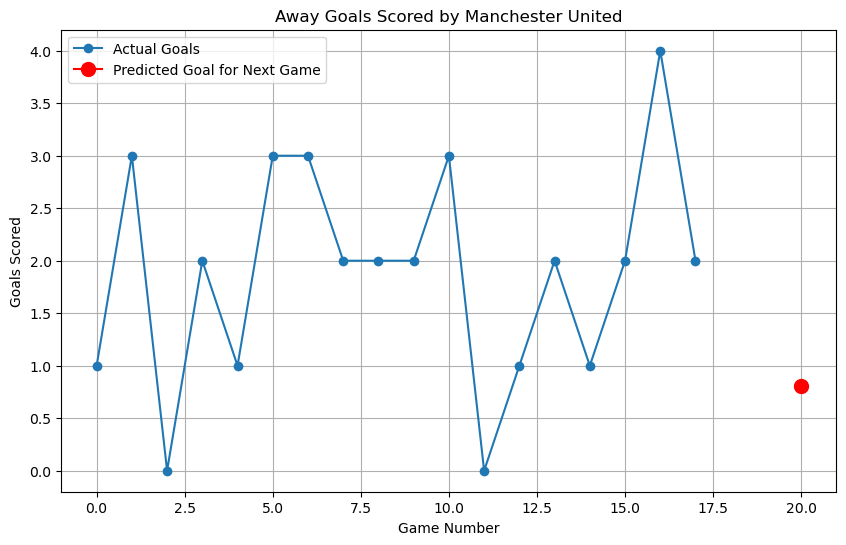

In [20]:
X1 = np.array(range(len(team_data2))).reshape(-1, 1)
y1 = team_data2['Away Goals']
model = LinearRegression()
model.fit(X1,y1)
next_game_number = len(team_data2) + 1
next_game_prediction = model.predict([[next_game_number]])

plt.figure(figsize=(10, 6))
plt.plot(X, y, marker='o', label='Actual Goals')
plt.plot(next_game_number, next_game_prediction, marker='o', markersize=10, label='Predicted Goal for Next Game', color='red')
plt.title(f'Away Goals Scored by {team_name}')
plt.xlabel('Game Number')
plt.ylabel('Goals Scored')
plt.legend()
plt.grid()
plt.show()

In [21]:
print(f"The predicted number of goals for the next game is {next_game_prediction[0]:.2f}.")

The predicted number of goals for the next game is 0.81.


In [22]:
team_data1.head()

,date,clock,stadium,attendance,Home Team,Goals Home,Away Team,Away Goals,home_possessions,away_possessions,...,away_saves,home_fouls,away_fouls,home_yellow,away_yellow,home_red,away_red,links,Wins,Loss
0,2022-08-07,2:00pm,Old Trafford,73711.0,Manchester United,1,Brighton and Hove Albion,2,62.9,37.1,...,5,7,12,4,1,0,0,https://www.skysports.com/football/manchester-...,0,1
1,2022-09-04,4:30pm,Old Trafford,73431.0,Manchester United,3,Arsenal,1,39.5,60.5,...,3,13,9,3,3,0,0,https://www.skysports.com/football/manchester-...,1,0
2,2022-10-16,2:00pm,Old Trafford,73726.0,Manchester United,0,Newcastle United,0,63.0,37.0,...,2,13,11,3,1,0,0,https://www.skysports.com/football/manchester-...,0,1
3,2022-10-19,8:15pm,Old Trafford,73677.0,Manchester United,2,Tottenham Hotspur,0,51.9,48.1,...,8,7,7,1,0,0,0,https://www.skysports.com/football/manchester-...,1,0
4,2022-10-30,4:15pm,Old Trafford,73682.0,Manchester United,1,West Ham United,0,53.0,47.0,...,2,12,10,1,3,0,0,https://www.skysports.com/football/manchester-...,1,0


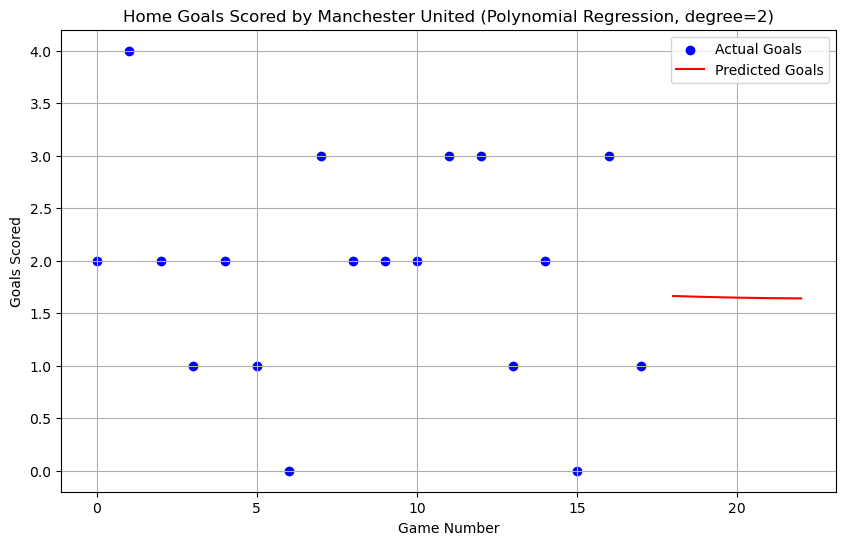

The predicted number of goals for the next game is 1.66.


In [23]:
#USING POLYNOMIAL REGRESSION


import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Select a specific team, for example, "Manchester City"
team_name = "Manchester United"
team_data3 = data[data['Home Team'] == team_name]

# Reset the index to ensure the indices are consistent
team_data3.reset_index(drop=True, inplace=True)

# Prepare the data for polynomial regression
X = np.array(range(len(team_data3))).reshape(-1, 1)
y = team_data3['Goals Home']

# Transform the features to higher degree polynomials
degree = 2  # Adjust the degree as needed
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X)

# Fit a polynomial regression model
model = LinearRegression()
model.fit(X_poly, y)

# Predict the number of goals for the next game
next_game_number = len(team_data3)
next_game_prediction = model.predict(poly_features.transform([[next_game_number]]))

# Plot the historical data and the polynomial regression curve
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='b', label='Actual Goals')
X_test = np.array(range(len(team_data3), len(team_data3) + 5)).reshape(-1, 1)
plt.plot(X_test, model.predict(poly_features.transform(X_test)), color='r', label='Predicted Goals')
plt.title(f'Home Goals Scored by {team_name} (Polynomial Regression, degree={degree})')
plt.xlabel('Game Number')
plt.ylabel('Goals Scored')
plt.legend()
plt.grid()
plt.show()

print(f"The predicted number of goals for the next game is {next_game_prediction[0]:.2f}.")


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
players = pd.read_csv("player_stats.csv")

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf1 in position 7417: invalid continuation byte

In [3]:
players.head()

NameError: name 'players' is not defined

In [ ]:
top = ["Premier League"]
pl_players = players[players["Comp"]=="Premier League"].reset_index()
fields=["index","Rk"]
pl_players=pl_players.drop(fields,axis=1)
pl_players

,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,...,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
0,Brenden Aaronson,USA,MFFW,Leeds United,Premier League,22,2000,20,19,1596,...,0.17,2.54,0.51,0.0,0.00,0.0,4.86,0.34,1.19,22.2
1,Che Adams,SCO,FW,Southampton,Premier League,26,1996,21,18,1577,...,0.40,0.51,0.69,0.0,0.00,0.0,2.29,2.97,5.03,37.1
2,Tyler Adams,USA,MF,Leeds United,Premier League,23,1999,19,19,1706,...,0.05,0.11,2.00,0.0,0.00,0.0,8.68,0.89,0.63,58.6
3,Tosin Adarabioyo,ENG,DF,Fulham,Premier League,25,1997,14,12,1095,...,0.00,0.08,0.41,0.0,0.00,0.0,4.67,2.13,0.41,83.9
4,Nayef Aguerd,MAR,DF,West Ham,Premier League,26,1996,6,5,515,...,0.18,0.00,1.58,0.0,0.00,0.0,5.26,1.75,1.05,62.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,Jordan Zemura,ZIM,DF,Bournemouth,Premier League,23,1999,16,14,1217,...,0.00,1.04,1.48,0.0,0.07,0.0,4.67,0.44,0.74,37.5
536,Oleksandr Zinchenko,UKR,DF,Arsenal,Premier League,26,1996,14,13,1081,...,0.00,1.83,0.75,0.0,0.00,0.0,7.00,1.75,0.58,75.0
537,Hakim Ziyech,MAR,FWMF,Chelsea,Premier League,29,1993,12,5,511,...,0.53,9.47,1.75,0.0,0.00,0.0,6.14,0.00,0.53,0.0
538,Kurt Zouma,FRA,DF,West Ham,Premier League,28,1994,15,15,1274,...,0.00,0.00,0.14,0.0,0.00,0.0,3.94,2.61,0.35,88.1


In [ ]:
unique = pl_players["Pos"].unique()
unique = unique.tolist()
unique

['MFFW', 'FW', 'MF', 'DF', 'FWMF', 'GK', 'DFMF', 'FWDF', 'DFFW', 'MFDF']

In [ ]:
highest_goal_scorer = pl_players["goals"].max()
highest_goal_scorer

NameError: name 'pl_players' is not defined